In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import sys
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Get the directory of the current script
try:
    # This will work if the script is being run as a file
    current_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    # Use the current working directory if __file__ is not defined
    current_dir = os.getcwd()

from build_a_pipeline import build_pipeline_P0_foward_price
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import TimeDistributed, Dense

In [2]:
import os
import random
import numpy as np
import tensorflow as tf

seed_value = 42
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'

In [3]:
from build_a_pipeline import build_pipeline_P0_foward_price
multivariate_lstm_performance = []
x_train, x_val, X_test, y_train, y_val, y_test = build_pipeline_P0_foward_price(target_column = 'P0')
datetime_index = x_val.index
#x_val = x_val.sort_index(ascending=True)
#y_val = y_val.sort_index(ascending=True)
# Convert x_train and x_val to NumPy arrays
x_train = x_train.to_numpy()
x_val = x_val.to_numpy()
# Reshape x_train and x_val to have the required 3D shape
x_train = x_train.reshape(x_train.shape[0], 1, x_train.shape[1])  # [samples, time_steps=1, features]
x_val = x_val.reshape(x_val.shape[0], 1, x_val.shape[1])    
multivariate_lstm_performance = [] 

In [4]:


# Build the LSTM multivariate_lstm
multivariate_lstm = Sequential([
    LSTM(200, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True),
    TimeDistributed(Dense(100, activation='selu')), 
    Flatten(),
    Dense(1)  # Output layer
])

# mmodelCheckpoint to save the best multivariate_lstm based on validation loss
multivariate_lstm_checkpoint = ModelCheckpoint('multivariate_lstm.keras', monitor='val_loss', save_best_only=True)

# EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Optimizer with adjusted learning rate
optimizer = Adam(learning_rate=6e-3, amsgrad=True)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the multivariate_lstm
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

# Train the multivariate_lstm (make sure you pass both x_val and y_val)
history = multivariate_lstm.fit(x_train, y_train, epochs=120,
                                validation_data=(x_val, y_val),
                                callbacks=[early_stopping, multivariate_lstm_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final validation RMSE: {val_rmse}")
multivariate_lstm_performance.append({
    'multivariate_lstm': 'Best So Far',
    'LayerExtra': 'TimeDistributed, Dense, Relu',
    'Train RMSE': train_rmse,
    'Validation RMSE': val_rmse
})

C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step - loss: 23475.6387 - root_mean_squared_error: 152.5851 - val_loss: 24744.4688 - val_root_mean_squared_error: 157.3037
Epoch 2/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 12081.7207 - root_mean_squared_error: 108.9706 - val_loss: 11574.0391 - val_root_mean_squared_error: 107.5827
Epoch 3/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 5627.0029 - root_mean_squared_error: 74.3685 - val_loss: 3275.9304 - val_root_mean_squared_error: 57.2357
Epoch 4/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 1634.1864 - root_mean_squared_error: 40.2367 - val_loss: 407.0006 - val_root_mean_squared_error: 20.1743
Epoch 5/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 839.5073 - root_mean_squared_error: 28.7873 - val_loss: 424.9790 - val_root_mean_squared_error: 20.6150
Epoch 6/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 660.0628 - root_mean_squared_error: 25.5575 - val_loss: 379.6837 - val_root_mean_squared_error: 19.4855
E

### Reordered Layers

In [5]:

from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import TimeDistributed, Dense

# Define the multivariate_lstm
multivariate_lstm = Sequential([
    TimeDistributed(Dense(100, activation='selu'), input_shape=(x_train.shape[1], x_train.shape[2])), 
    LSTM(200, return_sequences=True),
    Flatten(),
    Dense(1)  # Output layer
])

# mmodelCheckpoint to save the best multivariate_lstm based on validation loss
multivariate_lstm_checkpoint = ModelCheckpoint('multivariate_lstm.keras', monitor='val_loss', save_best_only=True)

# EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Optimizer with adjusted learning rate
optimizer = Adam(learning_rate=6e-3, amsgrad=True)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the multivariate_lstm
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

# Train the multivariate_lstm (make sure you pass both x_val and y_val)
history = multivariate_lstm.fit(x_train, y_train, epochs=120,
                                validation_data=(x_val, y_val),
                                callbacks=[early_stopping, multivariate_lstm_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final validation RMSE: {val_rmse}")
multivariate_lstm_performance.append({
    'multivariate_lstm': 'Multivariate LSTM',
    'LayerExtra': 'Reordered Layers',
    'Train RMSE': train_rmse,
    'Validation RMSE': val_rmse
})

C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 117ms/step - loss: 24378.6094 - root_mean_squared_error: 155.6484 - val_loss: 35912.3438 - val_root_mean_squared_error: 189.5055
Epoch 2/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - loss: 21684.3438 - root_mean_squared_error: 146.7646 - val_loss: 33401.8047 - val_root_mean_squared_error: 182.7616
Epoch 3/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 19752.7227 - root_mean_squared_error: 140.0339 - val_loss: 31168.8945 - val_root_mean_squared_error: 176.5471
Epoch 4/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 18075.9844 - root_mean_squared_error: 133.9141 - val_loss: 29219.3418 - val_root_mean_squared_error: 170.9367
Epoch 5/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 16557.7695 - root_mean_squared_error: 128.1273 - val_loss: 27361.2637 - val_root_mean_squared_error: 165.4124
Epoch 6/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 15151.3184 - root_mean_squared_error: 122.5422 - val_loss: 25715.8047 - val_root_mean_sq

In [6]:


# Define the multivariate_lstm
multivariate_lstm = Sequential([
    TimeDistributed(Dense(210, activation='selu'), input_shape=(x_train.shape[1], x_train.shape[2])), 
    LSTM(140, return_sequences=True),
    Dropout(0.5),
    LSTM(98, return_sequences=True),
    Dropout(0.3),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Flatten(),
    Dense(1)  # Output layer
])

# mmodelCheckpoint to save the best multivariate_lstm based on validation loss
multivariate_lstm_checkpoint = ModelCheckpoint('multivariate_lstm.keras', monitor='val_loss', save_best_only=True)

# EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Optimizer with adjusted learning rate
optimizer = Adam(learning_rate=6e-3, amsgrad=True)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the multivariate_lstm
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

# Train the multivariate_lstm (make sure you pass both x_val and y_val)
history = multivariate_lstm.fit(x_train, y_train, epochs=120,
                                validation_data=(x_val, y_val),
                                callbacks=[early_stopping, multivariate_lstm_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final validation RMSE: {val_rmse}")
multivariate_lstm_performance.append({
    'multivariate_lstm': 'Multivariate LSTM',
    'LayerExtra': 'Reordered Layers',
    'Train RMSE': train_rmse,
    'Validation RMSE': val_rmse
})



Epoch 1/120


C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 24777.9492 - root_mean_squared_error: 156.9628 - val_loss: 37361.0469 - val_root_mean_squared_error: 193.2901
Epoch 2/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23004.8359 - root_mean_squared_error: 151.2217 - val_loss: 36233.1992 - val_root_mean_squared_error: 190.3502
Epoch 3/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 22103.2793 - root_mean_squared_error: 148.2142 - val_loss: 35201.2969 - val_root_mean_squared_error: 187.6201
Epoch 4/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 21280.9199 - root_mean_squared_error: 145.4135 - val_loss: 34260.6484 - val_root_mean_squared_error: 185.0963
Epoch 5/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 20535.5996 - root_mean_squared_error: 142.8286 - val_loss: 33394.0898 - val_root_mean_squared_error: 182.7405
Epoch 6/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 19873.0488 - root_mean_squared_error: 140.4909 - val_loss: 32590.9512 - val_root_mean_squared_error: 1

Adding Another Layers with Kernel Regularizer

In [7]:

# Define the multivariate_lstm
multivariate_lstm = Sequential([
    TimeDistributed(Dense(100, activation='selu'), input_shape=(x_train.shape[1], x_train.shape[2])), 
    LSTM(70, return_sequences=True),
    Dropout(0.4),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)  # Output layer
])
# mmodelCheckpoint to save the best multivariate_lstm based on validation loss
multivariate_lstm_checkpoint = ModelCheckpoint('multivariate_lstm.keras', monitor='val_loss', save_best_only=True)

# EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Optimizer with adjusted learning rate
optimizer = Adam(learning_rate=6e-3, amsgrad=True)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the multivariate_lstm
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

# Train the multivariate_lstm (make sure you pass both x_val and y_val)
history = multivariate_lstm.fit(x_train, y_train, epochs=120,
                                validation_data=(x_val, y_val),
                                callbacks=[early_stopping, multivariate_lstm_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final validation RMSE: {val_rmse}")
multivariate_lstm_performance.append({
    'multivariate_lstm': 'Multivariate LSTM',
    'LayerExtra': 'Kernal Regulizor',
    'Train RMSE': train_rmse,
    'Validation RMSE': val_rmse
})



Epoch 1/120


C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 24860.4219 - root_mean_squared_error: 157.2348 - val_loss: 37583.1250 - val_root_mean_squared_error: 193.8637
Epoch 2/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23119.7676 - root_mean_squared_error: 151.5853 - val_loss: 35930.8984 - val_root_mean_squared_error: 189.5545
Epoch 3/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 21832.8164 - root_mean_squared_error: 147.2983 - val_loss: 34757.0586 - val_root_mean_squared_error: 186.4324
Epoch 4/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 20895.4980 - root_mean_squared_error: 144.0829 - val_loss: 33747.4531 - val_root_mean_squared_error: 183.7048
Epoch 5/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20091.8457 - root_mean_squared_error: 141.2716 - val_loss: 32841.8320 - val_root_mean_squared_error: 181.2232
Epoch 6/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 19354.3945 - root_mean_squared_error: 138.6435 - val_loss: 32013.2715 - val_root_mean_squared_error: 178.92

It is doing well but overfitting

In [8]:

from tensorflow.keras.regularizers import l2

# Define the multivariate_lstm
multivariate_lstm = Sequential([
    TimeDistributed(Dense(100, activation='selu', kernel_regularizer=l2(0.001)), input_shape=(x_train.shape[1], x_train.shape[2])),
    LSTM(70, return_sequences=True, kernel_regularizer=l2(0.001)),
    Dropout(0.4),
    LSTM(50, return_sequences=False, kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(1, kernel_regularizer=l2(0.001))  # Output layer
])
# mmodelCheckpoint to save the best multivariate_lstm based on validation loss
multivariate_lstm_checkpoint = ModelCheckpoint('multivariate_lstm.keras', monitor='val_loss', save_best_only=True)

# EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Optimizer with adjusted learning rate
optimizer = Adam(learning_rate=6e-3, amsgrad=True)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the multivariate_lstm
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

# Train the multivariate_lstm (make sure you pass both x_val and y_val)
history = multivariate_lstm.fit(x_train, y_train, epochs=120,
                                validation_data=(x_val, y_val),
                                callbacks=[early_stopping, multivariate_lstm_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final validation RMSE: {val_rmse}")
multivariate_lstm_performance.append({
    'multivariate_lstm': 'Multivariate LSTM',
    'LayerExtra': 'Kernal Regulizor',
    'Train RMSE': train_rmse,
    'Validation RMSE': val_rmse
})



C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/120


18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - loss: 24892.1543 - root_mean_squared_error: 157.3379 - val_loss: 37717.9297 - val_root_mean_squared_error: 194.2100
Epoch 2/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 23163.8027 - root_mean_squared_error: 151.7349 - val_loss: 36103.8555 - val_root_mean_squared_error: 190.0084
Epoch 3/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 21967.0742 - root_mean_squared_error: 147.7454 - val_loss: 34947.3281 - val_root_mean_squared_error: 186.9399
Epoch 4/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 21032.2637 - root_mean_squared_error: 144.5536 - val_loss: 33932.9727 - val_root_mean_squared_error: 184.2067
Epoch 5/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 20256.4766 - root_mean_squared_error: 141.8404 - val_loss: 33025.1953 - val_root_mean_squared_error: 181.7258
Epoch 6/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 19524.4102 - root_mean_squared_error: 139.2430 - val_loss: 32196.2363 - val_root_mean_squared_error: 1

Even more overfitting, trying smaller multivariate_lstm

In [9]:

from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define the multivariate_lstm
multivariate_lstm = Sequential([
    TimeDistributed(Dense(30, activation='selu'), input_shape=(x_train.shape[1], x_train.shape[2])),
    LSTM(20, return_sequences=True, kernel_regularizer=l2(0.3)),
    Dropout(0.5),
    LSTM(15, return_sequences=False,kernel_regularizer=l2(0.2)),
    Dropout(0.3),
    Dense(1,kernel_regularizer=l2(0.02))  # Output layer
])
# mmodelCheckpoint to save the best multivariate_lstm based on validation loss
multivariate_lstm_checkpoint = ModelCheckpoint('multivariate_lstm.keras', monitor='val_loss', save_best_only=True)

# EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Optimizer with adjusted learning rate
#optimizer = Adam(learning_rate=6e-3, amsgrad=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6)
optimizer = Adam(learning_rate=0.001)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the multivariate_lstm
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

# Train the multivariate_lstm (make sure you pass both x_val and y_val)
history = multivariate_lstm.fit(x_train, y_train, epochs=120,
                                validation_data=(x_val, y_val),
                                callbacks=[early_stopping, multivariate_lstm_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final validation RMSE: {val_rmse}")
multivariate_lstm_performance.append({
    'multivariate_lstm': 'Multivariate LSTM',
    'LayerExtra': 'Kernal Regulizor',
    'Train RMSE': train_rmse,
    'Validation RMSE': val_rmse
})



C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 83ms/step - loss: 25153.1953 - root_mean_squared_error: 158.1299 - val_loss: 39620.7695 - val_root_mean_squared_error: 199.0060
Epoch 2/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 25103.0762 - root_mean_squared_error: 157.9754 - val_loss: 39552.2383 - val_root_mean_squared_error: 198.8360
Epoch 3/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 25041.5195 - root_mean_squared_error: 157.7837 - val_loss: 39459.2188 - val_root_mean_squared_error: 198.6029
Epoch 4/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 24968.4453 - root_mean_squared_error: 157.5527 - val_loss: 39326.6992 - val_root_mean_squared_error: 198.2688
Epoch 5/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 24869.2031 - root_mean_squared_error: 157.2358 - val_loss: 39155.1523 - val_root_mean_squared_error: 197.8344
Epoch 6/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 24726.3750 - root_mean_squared_error: 156.7738 - val_loss: 38959.7656 - val_root_mean_squa

### Batch Normalization

In [10]:

from tensorflow.keras.layers import BatchNormalization
# Define the multivariate_lstm
multivariate_lstm = Sequential([
    TimeDistributed(Dense(210, activation='selu'), input_shape=(x_train.shape[1], x_train.shape[2])),
    BatchNormalization(),
    LSTM(140, return_sequences=True),
    Dropout(0.5),
    LSTM(98, return_sequences=True),
    Dropout(0.3),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Flatten(),
    Dense(1)  # Output layer
])

# mmodelCheckpoint to save the best multivariate_lstm based on validation loss
multivariate_lstm_checkpoint = ModelCheckpoint('multivariate_lstm.keras', monitor='val_loss', save_best_only=True)

# EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Optimizer with adjusted learning rate
optimizer = Adam(learning_rate=6e-3, amsgrad=True)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the multivariate_lstm
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

# Train the multivariate_lstm (make sure you pass both x_val and y_val)
history = multivariate_lstm.fit(x_train, y_train, epochs=120,
                                validation_data=(x_val, y_val),
                                callbacks=[early_stopping, multivariate_lstm_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final validation RMSE: {val_rmse}")
multivariate_lstm_performance.append({
    'multivariate_lstm': 'Multivariate LSTM',
    'LayerExtra': 'Kernal Regulizor',
    'Train RMSE': train_rmse,
    'Validation RMSE': val_rmse
})



C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 46s 542ms/step - loss: 24761.8008 - root_mean_squared_error: 156.9098 - val_loss: 37287.7656 - val_root_mean_squared_error: 193.1004
Epoch 2/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - loss: 22944.4980 - root_mean_squared_error: 151.0241 - val_loss: 36162.2812 - val_root_mean_squared_error: 190.1638
Epoch 3/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - loss: 22042.9277 - root_mean_squared_error: 148.0096 - val_loss: 35133.4062 - val_root_mean_squared_error: 187.4391
Epoch 4/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - loss: 21188.2324 - root_mean_squared_error: 145.0921 - val_loss: 34189.5547 - val_root_mean_squared_error: 184.9042
Epoch 5/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 182ms/step - loss: 20449.3105 - root_mean_squared_error: 142.5274 - val_loss: 33323.5195 - val_root_mean_squared_error: 182.5473
Epoch 6/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - loss: 19816.2891 - root_mean_squared_error: 140.2891 - val_loss: 32522.8379 - val_root_mea

In [11]:
performance_df = pd.DataFrame(multivariate_lstm_performance)
performance_df_sorted = performance_df.sort_values(by='Validation RMSE', ascending=True)
performance_df_sorted

,multivariate_lstm,LayerExtra,Train RMSE,Validation RMSE
1,Multivariate LSTM,Reordered Layers,13.014947,12.206678
0,Best So Far,"TimeDistributed, Dense, Relu",15.720953,16.490438
3,Multivariate LSTM,Kernal Regulizor,62.563274,86.468040
4,Multivariate LSTM,Kernal Regulizor,61.625214,86.918587
6,Multivariate LSTM,Kernal Regulizor,62.551891,88.517860
2,Multivariate LSTM,Reordered Layers,112.936333,150.943329
5,Multivariate LSTM,Kernal Regulizor,135.720627,179.301910


In [12]:
from tensorflow.keras.models import load_model
best_model = load_model('multivariate_lstm.keras')
y_pred = best_model.predict(x_val)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step


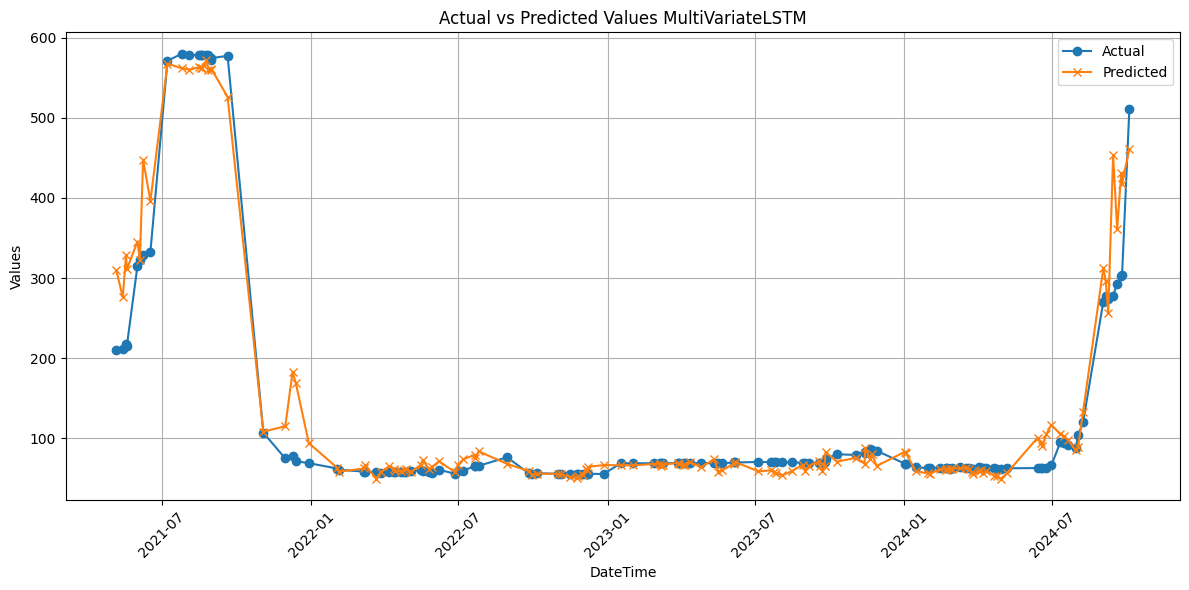

In [13]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

y_pred = y_pred.flatten()
predictions_df = pd.DataFrame(y_pred, index=datetime_index, columns=['Predicted'])
predictions_df = predictions_df.sort_index()
y_val = y_val.sort_index()

# Plotting y_actual vs y_pred
plt.figure(figsize=(12, 6))
plt.plot(y_val.index, y_val, label='Actual', marker='o')
plt.plot(y_val.index, predictions_df['Predicted'], label='Predicted', marker='x')
plt.title('Actual vs Predicted Values MultiVariateLSTM')
plt.xlabel('DateTime')
plt.ylabel('Values')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()